# GPGN409 homework 
your name: Benjamin Nguyen

In [1]:
using DataFrames, CSV
using LinearAlgebra
using Plots

In [2]:
# Load the data from the text file
df = CSV.read("HW3data.txt", DataFrame; delim=' ', ignorerepeated=true)

# Display the DataFrame
println(df)

13×4 DataFrame
 Row │ t(s)     x(yd)    z(yd)    s(yd)   
     │ Float64  Float64  Float64  Float64 
─────┼────────────────────────────────────
   1 │    0.07    44.08     1.31     1.13
   2 │    0.25    46.29     5.82     1.08
   3 │    0.43    51.16     7.33     1.0
   4 │    0.76    59.69    14.53     1.29
   5 │    1.22    71.77    18.6      0.78
   6 │    1.43    74.54    19.36     0.99
   7 │    1.49    76.08    18.2      1.19
   8 │    1.52    76.64    17.77     1.03
   9 │    1.8     83.04    17.78     1.52
  10 │    1.98    86.61    17.23     1.48
  11 │    2.14    90.72    17.58     1.82
  12 │    2.68   101.39    12.51     0.8
  13 │    2.84   104.92     8.86     1.36


## Drag Coefficient and Force

The drag coefficient is denoted by $k$.

The drag force is therefore given by:

$$
F = -kv
$$

where $v$ is the velocity.

The observable quantities $\{x_i, z_i\}$ are measured at time $t_i$ with uncertainties $s_i$.

### Equation of Motion

Since $F = ma$ (Newton's second law), the trajectory equations are:

$$
\begin{cases}
m \frac{dv_x}{dt} = -k v_x \\
m \frac{dv_z}{dt} = -k v_z - mg
\end{cases}
$$

Simplifying these:

$$
\begin{cases}
\frac{dv_x}{dt} + \frac{k}{m} v_x = 0 \\
\frac{dv_z}{dt} + \frac{k}{m} v_z = -g
\end{cases}
$$

### Solutions for Velocity

Solving these differential equations gives:

$$
\begin{cases}
v_x(t) = v_{x_0} \exp\left(-\frac{k}{m} t\right) \\
v_z(t) = v_{z_0} \exp\left(-\frac{k}{m} t\right) - \frac{gm}{k} \left(1 - \exp\left(-\frac{k}{m} t\right)\right)
\end{cases}
$$

### Assuming Small $k$ (Small Drag Approximation)

When $k$ is small, we can approximate:

$$
\exp\left(-\frac{k}{m} t\right) \approx 1 - \frac{k}{m} t
$$

Thus, the velocities become:

$$
\begin{cases}
v_x(t) = v_{x_0} \left(1 - \frac{k}{m} t\right) \\
v_z(t) = v_{z_0} \left(1 - \frac{k}{m} t\right) - g t
\end{cases}
$$

### Equations of Position

Integrating the velocities to find the position, we get:

$$
\begin{cases}
x(t) = x_0 + v_{x_0} t - \frac{v_{x_0} k}{2m} t^2 \\
z(t) = z_0 + v_{z_0} t - \frac{\left(v_{z_0} k / m + g\right)}{2} t^2
\end{cases}
$$

### Initial Velocities in Terms of Launch Angle

Given that:

$$
v_{x_0} = v_0 \cos \theta
$$

$$
v_{z_0} = v_0 \sin \theta
$$

Substituting these into the equations gives the trajectory in terms of the initial velocity $v_0$ and launch angle $\theta$:

$$
\begin{cases}
x(t) = x_0 + v_0 \cos \theta \, t - \frac{v_0 \cos \theta \, k}{2m} t^2 \\
z(t) = z_0 + v_0 \sin \theta \, t - \frac{\left(v_0 \sin \theta \, k / m + g\right)}{2} t^2
\end{cases}
$$

### Variable Substitution

Let:

$$
a = x_0, \quad b = v_0 \cos \theta, \quad c = - \frac{v_0 \cos \theta \, k}{2m}, \quad d = z_0, \quad e = v_0 \sin \theta, \quad f = \frac{\left(v_0 \sin \theta \, k / m + g\right)}{2}
$$

Then, the position equations simplify to:

$$
\begin{cases}
x(t) = a + b t + c t^2 \\
z(t) = d + e t + f t^2
\end{cases}
$$



### Parameters

#### Data Parameters:

We have a column vector representing the data parameters:

$$
\text{data} =
\begin{pmatrix}
x_1 \\
\vdots \\
x_N \\
z_1 \\
\vdots \\
z_N
\end{pmatrix}
$$

Where $x_1, \ldots, x_N$ are the $x$-coordinates, and $z_1, \ldots, z_N$ are the $z$-coordinates at different times.

#### Model Parameters:

The model parameters are represented by the following column vector:

$$
\text{model} =
\begin{pmatrix}
a \\
b \\
c \\
d \\
e \\
f
\end{pmatrix}
$$



#### Operator Matrix:

The model can be expressed as a matrix with size $2N \times 6$, where the rows correspond to the equations for $x(t)$ and $z(t)$ for different times $t_1, t_2, \dots, t_N$:

$$
G =
\begin{pmatrix}
1 & t_1 & t_1^2 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & t_N & t_N^2 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & t_1 & t_1^2 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 1 & t_N & t_N^2
\end{pmatrix}
$$

This matrix maps the model parameters $(a, b, c, d, e, j)$ to the corresponding $x$ and $z$ values at times $t_1, t_2, \ldots, t_N$.

## Weighted Least Square Matrix for Inversion

The diagonal matrix $W$ is used to apply weights in the weighted least squares method. The diagonal elements of this matrix are the weights $w_1, w_2, \ldots, w_N$, which apply to both the $x$ and $z$ components.


#### Least Squares and Weighted Least Squares

In the standard least squares method, we aim to minimize the residuals between the observed data and the predicted data. The residuals are defined as:

$$
\mathbf{r} = \|\mathbf{d} - G \cdot \mathbf{m}\|
$$

where:
- $\mathbf{d}$ is the vector of observed data.
- $G$ is the matrix operator (forward operator).
- $\mathbf{m}$ is the vector of model parameters.

In the **Weighted Least Squares** method, we introduce a weight matrix $W$ to account for different levels of uncertainty in the data. The weights are typically inversely proportional to the variance of the measurements, giving lower weights to data points with higher uncertainties.

The objective is to minimize the weighted residuals:

$$
\mathbf{r}_{\text{weighted}} = \| W (\mathbf{d} - G \cdot \mathbf{m}) \|
$$

where:
- $W$ is the diagonal weight matrix with elements $w_i = \frac{1}{\sigma_i^2}$, where $\sigma_i^2$ represents the variance (uncertainty) of the $i$-th observation.
- Higher uncertainties result in lower weights, ensuring that data points with greater uncertainty have less influence on the solution.

The solution is:

$$
\mathbf{m} = (G^T W^T W G)^{-1} G^T W^T W \mathbf{d}
$$

In [3]:
# The data parameters
d = [df[!,"x(yd)"]; df[!,"z(yd)"]]
# Display the data
d

26-element Vector{Float64}:
 44.08
 46.29
 51.16
 59.69
 71.77
 74.54
 76.08
 76.64
 83.04
 86.61
  ⋮
 18.6
 19.36
 18.2
 17.77
 17.78
 17.23
 17.58
 12.51
  8.86

In [4]:
t = df[!,"t(s)"] # Vector of time values
N = length(t) # Number of time points
G = zeros(Float64, 2N, 6) # Initialize a (2N x 6) matrix filled with zeros
# Fill in the matrix as shown in the image
for i in 1:N
    G[i, 1] = 1
    G[i, 2] = t[i]
    G[i, 3] = t[i]^2
    G[N+i, 4] = 1
    G[N+i, 5] = t[i]
    G[N+i, 6] = t[i]^2
end
# Display the operator
G

26×6 Matrix{Float64}:
 1.0  0.07  0.0049  0.0  0.0   0.0
 1.0  0.25  0.0625  0.0  0.0   0.0
 1.0  0.43  0.1849  0.0  0.0   0.0
 1.0  0.76  0.5776  0.0  0.0   0.0
 1.0  1.22  1.4884  0.0  0.0   0.0
 1.0  1.43  2.0449  0.0  0.0   0.0
 1.0  1.49  2.2201  0.0  0.0   0.0
 1.0  1.52  2.3104  0.0  0.0   0.0
 1.0  1.8   3.24    0.0  0.0   0.0
 1.0  1.98  3.9204  0.0  0.0   0.0
 ⋮                             ⋮
 0.0  0.0   0.0     1.0  1.22  1.4884
 0.0  0.0   0.0     1.0  1.43  2.0449
 0.0  0.0   0.0     1.0  1.49  2.2201
 0.0  0.0   0.0     1.0  1.52  2.3104
 0.0  0.0   0.0     1.0  1.8   3.24
 0.0  0.0   0.0     1.0  1.98  3.9204
 0.0  0.0   0.0     1.0  2.14  4.5796
 0.0  0.0   0.0     1.0  2.68  7.1824
 0.0  0.0   0.0     1.0  2.84  8.0656

In [5]:
# Calculate the weights (w = 1/s)
w = 1.0 ./ df[!,"s(yd)"]  # Element-wise division to get weights
# Create a 2N x 2N diagonal matrix with w_1, w_2, ..., w_N repeated for both x and z components
W = Diagonal(vcat(w, w))
W # Display the matrix

26×26 Diagonal{Float64, Vector{Float64}}:
 0.884956   ⋅         ⋅    ⋅        …   ⋅         ⋅         ⋅     ⋅ 
  ⋅        0.925926   ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅        1.0   ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅   0.775194      ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅        …   ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
 ⋮                                  ⋱                            ⋮
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅  

The solution is:

$$
\mathbf{m} = (G^T W^T W G)^{-1} G^T W^T W \mathbf{d}
$$

In [6]:
# Calculate m
m = (G'W'W*G)^-1*G'W'W*d
a, b, c, d, e, f = m;

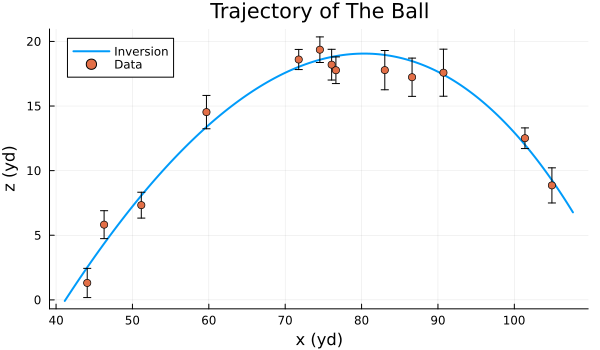

In [7]:
# TimeAxis and x, z values for plotting
t = 0:0.02:3
x = a .+ b*t .+ c*t.^2
z = d .+ e*t .+ f*t.^2;

# Plot
plot(x,z, label="Inversion", linewidth=2, size=(600, 350))
scatter!(df[!,"x(yd)"], df[!,"z(yd)"], yerror=df[!,"s(yd)"], label="Data")
title!("Trajectory of The Ball")
xlabel!("x (yd)")
ylabel!("z (yd)")

In [8]:
# Parameters: x0; z0
t = 0
x = m[1] .+ m[2]*t .+ m[3]*t.^2
z = m[4] .+ m[5]*t .+ m[6]*t.^2;
# Assume the x0 and z0 is the value at t = 0
# therefore we 

-0.08275679572700767

Because:
$$
a = x_0, \quad b = v_0 \cos \theta, \quad c = - \frac{v_0 \cos \theta \, k}{2m}, \quad d = z_0, \quad e = v_0 \sin \theta, \quad f = \frac{\left(v_0 \sin \theta \, k / m + g\right)}{2}
$$


In [9]:
# x0, z0
println("x0 = $a [yd]")
println("z0 = $b [yd]")

x0 = 41.137768932360586 [yd]
z0 = 25.240937172201257 [yd]



The result yields a small negative $z_0$, but I think this is not an issue because the data contains uncertainties and we are performing an inversion. As such, an exact solution is not expected. Instead, reasonable results that fit within the uncertainty range are acceptable.

$b = v_0 \cos \theta$ 

$e = v_0 \sin \theta$

$v_0 = \sqrt{(b^2+e^2)}$

In [10]:
# Solve for v0
v0 = sqrt(b^2 + e^2)
println("v0 = $v0 [yd/s]")

v0 = 34.13782602439344 [yd/s]


$b = v_0 \cos \theta$ 


In [11]:
# Calculate theta in radians
theta = acos(b / v0)

# Convert theta to degrees (optional)
theta_deg = rad2deg(theta)

# Print the result
println("Theta in radians: ", theta)
println("Theta in degrees: ", theta_deg)

Theta in radians: 0.7386424429759915
Theta in degrees: 42.32109455175689


$c = - \frac{v_0 \cos \theta \, k}{2m}$

In [12]:
# Solve for k
mass = 0.4
k = -2 * mass * c / (v0 * cos(theta))

# Print the result
println("k = ", k)

k = 0.03235053305486214


$f = -\frac{\left(v_0 \sin \theta \, k / m + g\right)}{2}$

In [13]:
# Solve for g
g = - 2 * f - (v0 * sin(theta) * (k / mass))

# Print the result
println("g = ", g)

g = 11.940621854666851


# In 3D space
In 3D space, the initial velocities in the $x$, $y$, and $z$ directions are given by:

$$
\begin{cases}
v_{x_0} = v_0 \cos \theta \cos \phi \\
v_{y_0} = v_0 \cos \theta \sin \phi \\
v_{z_0} = v_0 \sin \theta
\end{cases}
$$

Where:
- $v_0$ is the initial speed,
- $\theta$ is the elevation angle,
- $\phi$ is the azimuthal angle.

The equations of motion with drag in 3D space are:

$$
\begin{cases}
x(t) = x_0 + v_0 \cos \theta \cos \phi \, t - \frac{v_0 \cos \theta \cos \phi \, k \, t^2}{2m} \\
y(t) = y_0 + v_0 \cos \theta \sin \phi \, t - \frac{v_0 \cos \theta \sin \phi \, k \, t^2}{2m} \\
z(t) = z_0 + v_0 \sin \theta \, t - \frac{\left(v_0 \sin \theta \, k / m + g\right)}{2} t^2
\end{cases}
$$

Let the following substitutions be made for the 3D motion equations:

$$
a = x_0, \quad b = v_0 \cos \theta \cos \phi, \quad c = - \frac{v_0 \cos \theta \cos \phi \, k}{2m}
$$
$$
d = y_0, \quad e = v_0 \cos \theta \sin \phi, \quad f = - \frac{v_0 \cos \theta \sin \phi \, k}{2m}
$$
$$
g = z_0, \quad h = v_0 \sin \theta, \quad i = - \frac{v_0 \sin \theta \, k}{2m} - \frac{g}{2}
$$

Using these substitutions, the position equations simplify to:

$$
\begin{cases}
x(t) = a + bt + ct^2 \\
y(t) = d + et + ft^2 \\
z(t) = g + ht + it^2
\end{cases}
$$

## Parameters

### Data Parameters:

We have a column vector representing the data parameters:

$$
\text{data} =
\begin{pmatrix}
x_1 \\
\vdots \\
x_N \\
y_1 \\
\vdots \\
y_N \\
z_1 \\
\vdots \\
z_N
\end{pmatrix}
$$

Where $x_1, \ldots, x_N$, $y_1, \ldots, y_N$, and $z_1, \ldots, z_N$ are the $x$, $y$, and $z$ coordinates at different times.

### Model Parameters:

The model parameters are represented by the following column vector:

$$
\text{model} =
\begin{pmatrix}
a \\
b \\
c \\
d \\
e \\
f \\
g \\
h \\
i
\end{pmatrix}
$$

### Operator Matrix:

The model can be expressed as a matrix with size $3N \times 9$, where the rows correspond to the equations for $x(t)$, $y(t)$, and $z(t)$ for different times $t_1, t_2, \ldots, t_N$:

$$
G =
\begin{pmatrix}
1 & t_1 & t_1^2 & 0 & 0 & 0 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & t_N & t_N^2 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & t_1 & t_1^2 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 1 & t_N & t_N^2 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & t_1 & t_1^2 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & t_N & t_N^2
\end{pmatrix}
$$


## Weighted Least Square Matrix for Inversion

The diagonal matrix $W$ is used to apply weights in the weighted least squares method. The diagonal elements of this matrix are the weights $w_1, w_2, \ldots, w_N$, which apply to both the $x$, $y$ and $z$ components.

## Assumption

We incorporate the $y$-component to address the problem, with $y$ ranging from 25.7 yd to 0.5 yd and the goal set 0.0 yd. Additionally, error is introduced to the $y $ data to account for uncertainties.


In [14]:
using Random

# Set the random seed for reproducibility
Random.seed!(1234)  # You can choose any integer as the seed

# Generate 13 equally spaced values between 0 and 30
y = range(0, 30, length=13)

# Define the standard deviation of the noise (you can adjust this value)
noise_level = 0.5  # Example noise level

# Add noise to y using a normal distribution
y = y .+ noise_level * randn(13)

# Print the noisy y values
y

13-element Vector{Float64}:
  0.4853281644276072
  2.0103907942324
  5.4509304417970466
  7.48359843537768
  9.699603888322219
 11.777411442356884
 16.35371197085789
 18.2622239317178
 19.897184811985987
 22.885351587545603
 24.39302991441482
 28.04574929103424
 30.610021898356063

In [15]:
insertcols!(df, 3, :"y(yd)" => y)

Row,t(s),x(yd),y(yd),z(yd),s(yd)
,Float64,Float64,Float64,Float64,Float64
1,0.07,44.08,0.485328,1.31,1.13
2,0.25,46.29,2.01039,5.82,1.08
3,0.43,51.16,5.45093,7.33,1.0
4,0.76,59.69,7.4836,14.53,1.29
5,1.22,71.77,9.6996,18.6,0.78
6,1.43,74.54,11.7774,19.36,0.99
7,1.49,76.08,16.3537,18.2,1.19
8,1.52,76.64,18.2622,17.77,1.03
9,1.8,83.04,19.8972,17.78,1.52


In [16]:
d = [df[!,"x(yd)"]; df[!,"y(yd)"]; df[!,"z(yd)"]]; # Data
t = df[!,"t(s)"] # Vector of time values
N = length(t) # Number of time points
G = zeros(Float64, 3N, 9) # Initialize a (2N x 6) matrix filled with zeros
# Fill in the matrix as shown in the image
for i in 1:N
    G[i, 1] = 1
    G[i, 2] = t[i]
    G[i, 3] = t[i]^2
    G[N+i, 4] = 1
    G[N+i, 5] = t[i]
    G[N+i, 6] = t[i]^2
    G[2N+i, 7] = 1
    G[2N+i, 8] = t[i]
    G[2N+i, 9] = t[i]^2
end
# Display the operator
G


39×9 Matrix{Float64}:
 1.0  0.07  0.0049  0.0  0.0  0.0  0.0  0.0   0.0
 1.0  0.25  0.0625  0.0  0.0  0.0  0.0  0.0   0.0
 1.0  0.43  0.1849  0.0  0.0  0.0  0.0  0.0   0.0
 1.0  0.76  0.5776  0.0  0.0  0.0  0.0  0.0   0.0
 1.0  1.22  1.4884  0.0  0.0  0.0  0.0  0.0   0.0
 1.0  1.43  2.0449  0.0  0.0  0.0  0.0  0.0   0.0
 1.0  1.49  2.2201  0.0  0.0  0.0  0.0  0.0   0.0
 1.0  1.52  2.3104  0.0  0.0  0.0  0.0  0.0   0.0
 1.0  1.8   3.24    0.0  0.0  0.0  0.0  0.0   0.0
 1.0  1.98  3.9204  0.0  0.0  0.0  0.0  0.0   0.0
 ⋮                            ⋮               
 0.0  0.0   0.0     0.0  0.0  0.0  1.0  1.22  1.4884
 0.0  0.0   0.0     0.0  0.0  0.0  1.0  1.43  2.0449
 0.0  0.0   0.0     0.0  0.0  0.0  1.0  1.49  2.2201
 0.0  0.0   0.0     0.0  0.0  0.0  1.0  1.52  2.3104
 0.0  0.0   0.0     0.0  0.0  0.0  1.0  1.8   3.24
 0.0  0.0   0.0     0.0  0.0  0.0  1.0  1.98  3.9204
 0.0  0.0   0.0     0.0  0.0  0.0  1.0  2.14  4.5796
 0.0  0.0   0.0     0.0  0.0  0.0  1.0  2.68  7.1824
 0.0  0.0

In [17]:
# Calculate the weights (w = 1/s)
w = 1.0 ./ df[!,"s(yd)"]  # Element-wise division to get weights
# Create a 2N x 2N diagonal matrix with w_1, w_2, ..., w_N repeated for both x and z components
W = Diagonal(vcat(w, w, w))
W # Display the matrix

39×39 Diagonal{Float64, Vector{Float64}}:
 0.884956   ⋅         ⋅    ⋅        …   ⋅         ⋅         ⋅     ⋅ 
  ⋅        0.925926   ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅        1.0   ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅   0.775194      ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅        …   ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
 ⋮                                  ⋱  ⋮                         
  ⋅         ⋅         ⋅    ⋅        …   ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅     ⋅ 
  ⋅         ⋅         ⋅    ⋅            ⋅         ⋅         ⋅   

In [18]:
# Calculate m
m = (G'W'W*G)^-1*G'W'W*d
a, b, c, d, e, f, g, h, i = m;

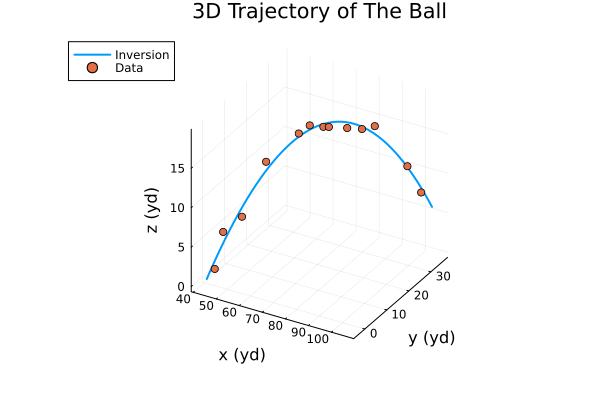

In [19]:
# TimeAxis and x, z values for plotting
t = 0:0.02:3
x = a .+ b*t .+ c*t.^2
y = d .+ e*t .+ f*t.^2;
z = g .+ h*t .+ i*t.^2;

# Plot
plot3d(x, y, z, label="Inversion", linewidth=2)
title!("3D Trajectory of The Ball")
xlabel!("x (yd)")
ylabel!("y (yd)")
zlabel!("z (yd)")

scatter3d!(df[!,"x(yd)"], df[!,"y(yd)"], df[!,"z(yd)"], label="Data", aspect_ratio=:equal)
# title!("Trajectory of The Ball")
